In [1]:
!pip install numpy
!pip install os
!pip install trimesh
!pip install scikit-learn
!pip install matplotlib
!pip install polymesh
!python3 -m pip install lapy
!pip install robust-laplacian
!pip install libigl
!pip install pandas

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [2]:
!pip install polyscope

In [3]:
import numpy as np
import trimesh
import robust_laplacian
import scipy.sparse.linalg as sla
import pandas as pd
import plotly.express as px
import polyscope as ps

In [4]:
k = 30 # num of eigenvalues
N = 50 #num of meshes for each class
cols = ['E' + str(i) for i in range(1, k+1)]
df = pd.DataFrame(columns= cols)
labels = []

## Annulus

### Example

In [5]:
# create mesh
annulus = trimesh.creation.annulus(r_min = 1, r_max = 3, height = 5)
V = np.array(annulus.vertices)
F = np.array(annulus.faces)

# visualize
ps.init()
ps_mesh = ps.register_surface_mesh("my mesh", V, F)
ps.show()


# do mesh finer
V, F = trimesh.remesh.subdivide(V, F)

# visualize
ps.init()
ps_mesh = ps.register_surface_mesh("my mesh", V, F)
ps.show()

# compute laplacian and eigenvals
L, M = robust_laplacian.mesh_laplacian(V, F)
e_values, e_vectors = sla.eigsh(L, k, M, sigma=1e-8)
print(e_values)

[3.16355913e-15 1.73871683e-01 1.82011803e-01 1.82011803e-01
 2.17057431e-01 4.16781074e-01 4.16781074e-01 4.84694408e-01
 5.56225390e-01 5.56225390e-01 6.43597837e-01 6.43597837e-01
 8.74707086e-01 8.74707086e-01 8.82320529e-01 9.86313425e-01
 1.07803704e+00 1.07803704e+00 1.13472152e+00 1.13472152e+00
 1.19948851e+00 1.19948851e+00 1.52193277e+00 1.52193277e+00
 1.54428704e+00 1.54428704e+00 1.67641009e+00 1.67641009e+00
 1.70112215e+00 1.70112215e+00]


In [6]:
## Add data

for i in range(N):
    # set random parameters
    r_min = np.random.uniform(0.2, 15)
    r_max = np.random.uniform(r_min + 0.5, 26)
    height = np.random.uniform(0.2, 10)    
    
    # create mesh
    annulus = trimesh.creation.annulus(r_min, r_max, height)
    V = np.array(annulus.vertices)
    F = np.array(annulus.faces)

    # remesh
    V, F = trimesh.remesh.subdivide(V, F)


    # compute laplacian and eigenvals
    L, M = robust_laplacian.mesh_laplacian(V, F)
    e_values, e_vectors = sla.eigsh(L, k, M, sigma=1e-8)
    df.loc[i] = e_values
    
    labels.append("annulus")

## Box

### Example

In [7]:
# create mesh
box = trimesh.creation.box( extents = [1, 2, 3])
V = np.array(box.vertices)
F = np.array(box.faces)

# visualize
ps.init()
ps_mesh = ps.register_surface_mesh("my mesh", V, F)
ps.show()


# do mesh finer
V, F = trimesh.remesh.subdivide(V, F)
# do mesh finer
V, F = trimesh.remesh.subdivide(V, F)
# do mesh finer
V, F = trimesh.remesh.subdivide(V, F)


# visualize
ps.init()
ps_mesh = ps.register_surface_mesh("my mesh", V, F)
ps.show()

# compute laplacian and eigenvals
L, M = robust_laplacian.mesh_laplacian(V, F)
e_values, e_vectors = sla.eigsh(L, k, M, sigma=1e-8)
print(e_values)

[3.10632785e-15 7.20953717e-01 1.26499000e+00 1.66637225e+00
 2.26163456e+00 2.73091920e+00 3.39694014e+00 4.51961309e+00
 4.79936134e+00 4.83587527e+00 5.46878107e+00 6.23431211e+00
 6.42693501e+00 6.62807585e+00 7.76932674e+00 8.20576861e+00
 9.21574848e+00 9.90341538e+00 1.00102172e+01 1.01473945e+01
 1.02271341e+01 1.14708470e+01 1.15773985e+01 1.16945373e+01
 1.22235406e+01 1.30032870e+01 1.40116985e+01 1.46207204e+01
 1.46997937e+01 1.52277491e+01]


In [8]:
## Add data

for i in range(N, 2*N):
    # set random parameters
    
    a = np.random.uniform(0.2, 6)
    b = np.random.uniform(0.2, 6)
    c = np.random.uniform(0.2, 6)
    
    # create mesh
    box = trimesh.creation.box(extents = [a, b, c])
    V = np.array(box.vertices)
    F = np.array(box.faces)

    # remesh
    V, F = trimesh.remesh.subdivide(V, F)
    V, F = trimesh.remesh.subdivide(V, F)


    # compute laplacian and eigenvals
    L, M = robust_laplacian.mesh_laplacian(V, F)
    e_values, e_vectors = sla.eigsh(L, k, M, sigma=1e-8)
    df.loc[i] = e_values
    
    labels.append("box")

## Capsule

### Example

In [9]:
# create mesh
capsule = trimesh.creation.capsule(height = 5, radius = 10)
V = np.array(capsule.vertices)
F = np.array(capsule.faces)

# visualize
ps.init()
ps_mesh = ps.register_surface_mesh("my mesh", V, F)
ps.show()


# do mesh finer
V, F = trimesh.remesh.subdivide(V, F)


# visualize
ps.init()
ps_mesh = ps.register_surface_mesh("my mesh", V, F)
ps.show()

# compute laplacian and eigenvals
L, M = robust_laplacian.mesh_laplacian(V, F)
e_values, e_vectors = sla.eigsh(L, k, M, sigma=1e-8)
print(e_values)

[1.38913719e-16 1.39092507e-02 1.71881351e-02 1.71881351e-02
 4.45469084e-02 4.45469084e-02 4.52146648e-02 5.32845988e-02
 5.32845988e-02 8.58291701e-02 9.17096449e-02 9.17096449e-02
 9.28267550e-02 9.28267550e-02 1.08636405e-01 1.08636405e-01
 1.44326262e-01 1.44326262e-01 1.48183517e-01 1.55688690e-01
 1.55688690e-01 1.59230867e-01 1.59230867e-01 1.83313853e-01
 1.83313853e-01 2.14065276e-01 2.18197398e-01 2.18197398e-01
 2.20700937e-01 2.20700937e-01]


In [10]:
## Add data

for i in range(2*N, 3*N):
    # set random parameters
    h = np.random.uniform(0.5, 15)
    r = np.random.uniform(0.5, 10)
    
    # create mesh
    capsule = trimesh.creation.capsule(height = h, radius = r)
    V = np.array(capsule.vertices)
    F = np.array(capsule.faces)

    # remesh
    V, F = trimesh.remesh.subdivide(V, F)

    # compute laplacian and eigenvals
    L, M = robust_laplacian.mesh_laplacian(V, F)
    e_values, e_vectors = sla.eigsh(L, k, M, sigma=1e-8)
    df.loc[i] = e_values
    
    labels.append("capsule")

## Cone
### Examples

In [11]:
# create mesh
cone = trimesh.creation.cone(height = 5, radius = 1)
V = np.array(cone.vertices)
F = np.array(cone.faces)

# visualize
ps.init()
ps_mesh = ps.register_surface_mesh("my mesh", V, F)
ps.show()


# do mesh finer
V, F = trimesh.remesh.subdivide(V, F)


# visualize
ps.init()
ps_mesh = ps.register_surface_mesh("my mesh", V, F)
ps.show()

# compute laplacian and eigenvals
L, M = robust_laplacian.mesh_laplacian(V, F)
e_values, e_vectors = sla.eigsh(L, k, M, sigma=1e-8)
print(e_values)

[-7.02595743e-15  3.31306097e-01  6.23609862e-01  1.89321980e+00
  1.89321980e+00  4.32651489e+00  4.32651489e+00  5.81324419e+00
  5.81324419e+00  5.82464995e+00  1.19254046e+01  1.19254046e+01
  1.27448848e+01  1.27448848e+01  1.56027560e+01  1.61530306e+01
  1.61530306e+01  2.02347340e+01  2.02347340e+01  2.41607311e+01
  2.41607311e+01  3.06975118e+01  3.06975118e+01  3.53805294e+01
  3.53805294e+01  4.30406055e+01  4.30406055e+01  4.32161990e+01
  4.32161990e+01  5.76533457e+01]


In [12]:
## Add data

for i in range(3*N, 4*N):
    # set random parameters
    h = np.random.uniform(0.5, 15)
    r = np.random.uniform(0.5, 13)
    
    # create mesh
    cone = trimesh.creation.cone(height = h, radius = r)
    V = np.array(cone.vertices)
    F = np.array(cone.faces)

    # remesh
    V, F = trimesh.remesh.subdivide(V, F)

    # compute laplacian and eigenvals
    L, M = robust_laplacian.mesh_laplacian(V, F)
    e_values, e_vectors = sla.eigsh(L, k, M, sigma=1e-8)
    df.loc[i] = e_values
    
    labels.append("cone")

In [13]:
df

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,...,E21,E22,E23,E24,E25,E26,E27,E28,E29,E30
0,6.635279e-17,0.006603,0.006603,0.026289,0.026289,0.058695,0.058695,0.103232,0.103232,0.159114,...,0.446100,0.446100,0.474990,0.475670,0.475670,0.479865,0.479865,0.481374,0.481374,0.500454
1,-2.025352e-18,0.010162,0.010162,0.033587,0.033587,0.034075,0.038391,0.045218,0.045218,0.055952,...,0.115613,0.115613,0.125810,0.126662,0.126662,0.140772,0.140772,0.159861,0.159861,0.165042
2,-2.085091e-16,0.014442,0.014442,0.024897,0.033887,0.040997,0.040997,0.048413,0.048413,0.080069,...,0.135263,0.135597,0.135597,0.145862,0.145862,0.148938,0.154325,0.175060,0.175060,0.177774
3,6.479322e-19,0.006499,0.006499,0.025448,0.025448,0.049462,0.055431,0.055431,0.056002,0.056002,...,0.107028,0.121430,0.121430,0.134447,0.141057,0.141057,0.142654,0.142654,0.149891,0.149891
4,-5.762890e-16,0.019212,0.019212,0.046132,0.051547,0.051547,0.059306,0.070517,0.070517,0.093424,...,0.206024,0.206024,0.240466,0.240466,0.251533,0.251533,0.278599,0.278599,0.326092,0.361803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-5.549446e-15,0.072212,0.128121,1.441513,1.441513,3.880509,3.880509,5.015473,5.015473,5.040124,...,22.870688,28.637306,28.637306,33.546935,33.546935,40.584196,40.584196,40.976269,40.976269,54.368661
196,-3.048313e-17,0.022572,0.022572,0.026632,0.059663,0.061020,0.061020,0.072001,0.072001,0.079282,...,0.180221,0.246881,0.246881,0.288157,0.288157,0.309991,0.309991,0.336136,0.336136,0.438686
197,7.792288e-18,0.030786,0.030786,0.034932,0.079255,0.083287,0.083287,0.095750,0.095750,0.102999,...,0.247834,0.338997,0.338997,0.393874,0.393874,0.427610,0.427610,0.462189,0.462189,0.603771
198,4.461121e-16,0.038329,0.045747,0.045747,0.087878,0.119942,0.119942,0.123899,0.123899,0.127349,...,0.393436,0.528832,0.528832,0.602464,0.602464,0.687168,0.687168,0.727285,0.727285,0.955686


## Cylinder

### Example


In [14]:
# create mesh
cylinder = trimesh.creation.cylinder(height = 5, radius = 1)
V = np.array(cylinder.vertices)
F = np.array(cylinder.faces)

# visualize
ps.init()
ps_mesh = ps.register_surface_mesh("my mesh", V, F)
ps.show()


# do mesh finer
V, F = trimesh.remesh.subdivide(V, F)


# visualize
ps.init()
ps_mesh = ps.register_surface_mesh("my mesh", V, F)
ps.show()

In [15]:
## Add data

for i in range(4*N, 5*N):
    # set random parameters
    h = np.random.uniform(0.5, 15)
    r = np.random.uniform(0.5, 13)
    
    # create mesh
    cone = trimesh.creation.cylinder(height = h, radius = r)
    V = np.array(cone.vertices)
    F = np.array(cone.faces)

    # remesh
    V, F = trimesh.remesh.subdivide(V, F)

    # compute laplacian and eigenvals
    L, M = robust_laplacian.mesh_laplacian(V, F)
    e_values, e_vectors = sla.eigsh(L, k, M, sigma=1e-8)
    df.loc[i] = e_values
    
    labels.append("cylinder")

## Sphere

### Example

In [16]:
 # create mesh
sphere = trimesh.creation.icosphere(radius = 1)
V = np.array(sphere.vertices)
F = np.array(sphere.faces)

# visualize
ps.init()
ps_mesh = ps.register_surface_mesh("my mesh", V, F)
ps.show()


# do mesh finer
V, F = trimesh.remesh.subdivide(V, F)


# visualize
ps.init()
ps_mesh = ps.register_surface_mesh("my mesh", V, F)
ps.show()

In [17]:
## Add data

for i in range(5*N, 6*N):
    # set random parameters
    r = np.random.uniform(0.3, 10)
    
    # create mesh
    sphere = trimesh.creation.icosphere(radius = r)
    V = np.array(sphere.vertices)
    F = np.array(sphere.faces)

    # remesh
    V, F = trimesh.remesh.subdivide(V, F)

    # compute laplacian and eigenvals
    L, M = robust_laplacian.mesh_laplacian(V, F)
    e_values, e_vectors = sla.eigsh(L, k, M, sigma=1e-8)
    df.loc[i] = e_values
    
    labels.append("sphere")

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df, labels)

In [28]:
print(X_train.shape, X_test.shape)

(225, 30) (75, 30)


In [29]:
print(len(y_train), len(y_test))

225 75


In [30]:
clf  = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
# Compute accuracy of the k-nearest neighbors classifier.

y_pred = clf.predict(X_test)

accuracy_random = accuracy_score(y_test, y_pred)


print(f"Accuracy of Random Forest classifier: {accuracy_random:.2f}")

Accuracy of Random Forest classifier: 0.69


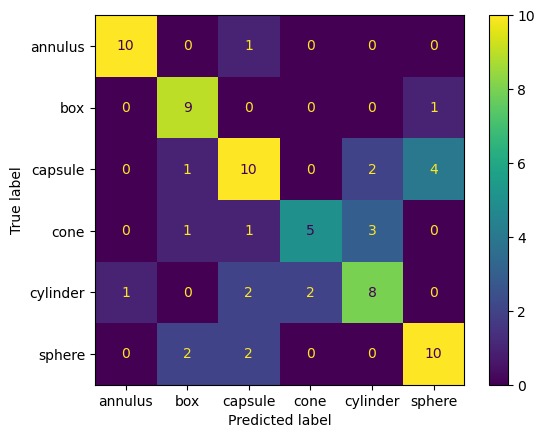

In [32]:
y_pred = clf.predict(X_test)

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf , X_test, y_test)

In [34]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
# Train a k-nearest neighbors classifier on the training set with 5 neighbors.

knn_classifier = KNeighborsClassifier(n_neighbors=20)

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [35]:
# Predict labels for the testing set.

y_pred_knn = knn_classifier.predict(X_test)

In [36]:
# Compute accuracy of the k-nearest neighbors classifier.

accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy of k-nearest neighbors classifier: {accuracy_knn:.2f}")

Accuracy of k-nearest neighbors classifier: 0.49


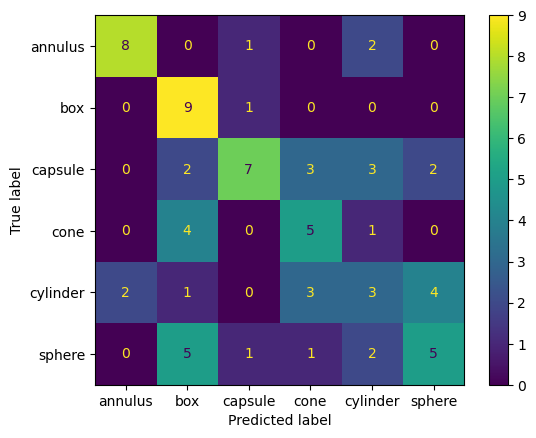

In [37]:
y_pred = knn_classifier.predict(X_test)

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(knn_classifier, X_test, y_test)

In [38]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
classifier = GradientBoostingClassifier(n_estimators=1000,max_depth=100)

classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred = classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of GB classifier: {accuracy:.2f}")

Accuracy of GB classifier: 0.71


In [40]:
svm_classifier = SVC(kernel="linear", C=0.025)

svm_classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred_svc = svm_classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy_svm = accuracy_score(y_test, y_pred_svc)

print(f"Accuracy of Linear SVM classifier: {accuracy_svm:.2f}")

Accuracy of Linear SVM classifier: 0.36


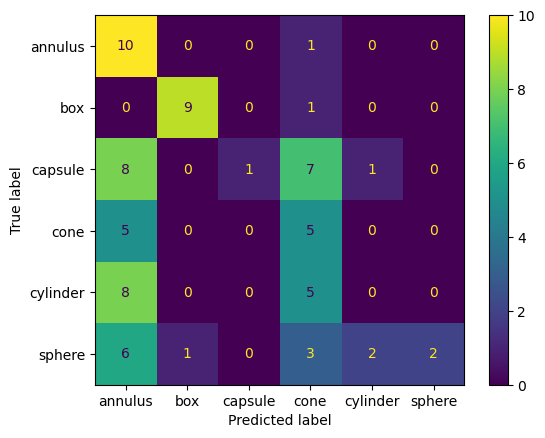

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(svm_classifier, X_test, y_test)

In [42]:
rbf_svm_classifier = SVC(gamma=2, C=1)

rbf_svm_classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred_rbf_svc = rbf_svm_classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy_rbf_svm = accuracy_score(y_test, y_pred_rbf_svc)

print(f"Accuracy of RBF SVM classifier: {accuracy_rbf_svm:.2f}")

Accuracy of RBF SVM classifier: 0.60


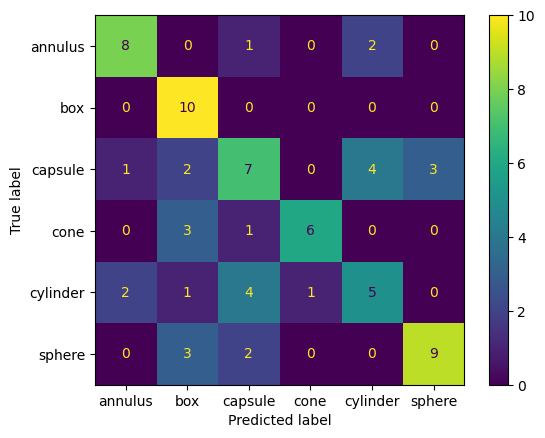

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rbf_svm_classifier, X_test, y_test)

In [44]:
gauss_classifier = GaussianProcessClassifier(1.0 * RBF(1.0))

gauss_classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred_gauss = gauss_classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy_gauss = accuracy_score(y_test, y_pred_gauss)

print(f"Accuracy of Gaussian Process classifier: {accuracy_gauss:.2f}")

C:\ProgramData\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels

Accuracy of Gaussian Process classifier: 0.59


C:\ProgramData\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


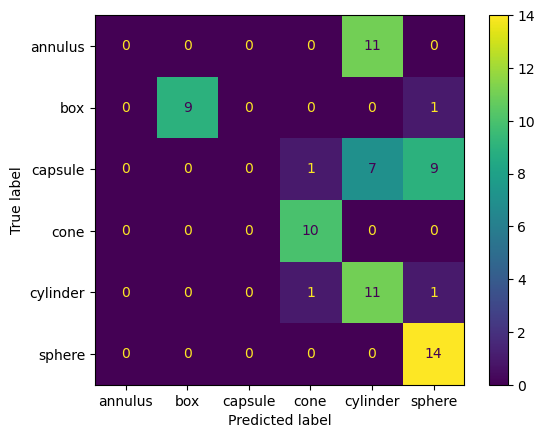

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(gauss_classifier, X_test, y_test)

In [46]:
dt_classifier = DecisionTreeClassifier(max_depth=5)

dt_classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred_dt = dt_classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Accuracy of Decision Tree classifier: {accuracy_dt:.2f}")

Accuracy of Decision Tree classifier: 0.56


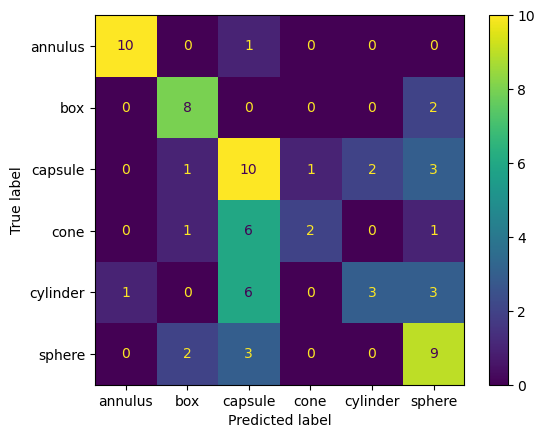

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(dt_classifier, X_test, y_test)

In [48]:
nn_classifier = MLPClassifier(alpha=1, max_iter=1000)

nn_classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred_nn = nn_classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy_nn = accuracy_score(y_test, y_pred_nn)

print(f"Accuracy of Neural Net classifier: {accuracy_nn:.2f}")

Accuracy of Neural Net classifier: 0.68


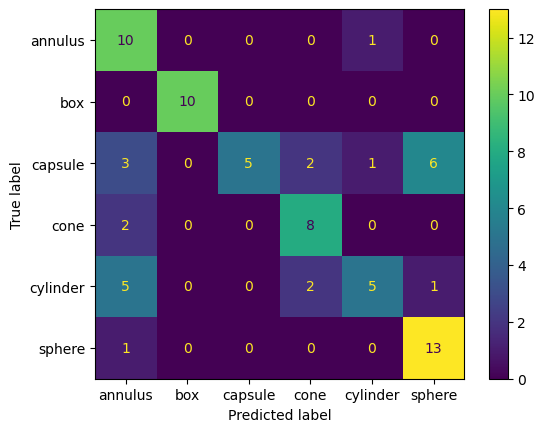

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(nn_classifier, X_test, y_test)

In [50]:
ada_classifier = AdaBoostClassifier()

ada_classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred_ada = ada_classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy_ada = accuracy_score(y_test, y_pred_ada)

print(f"Accuracy of AdaBoost classifier: {accuracy_ada:.2f}")

Accuracy of AdaBoost classifier: 0.43


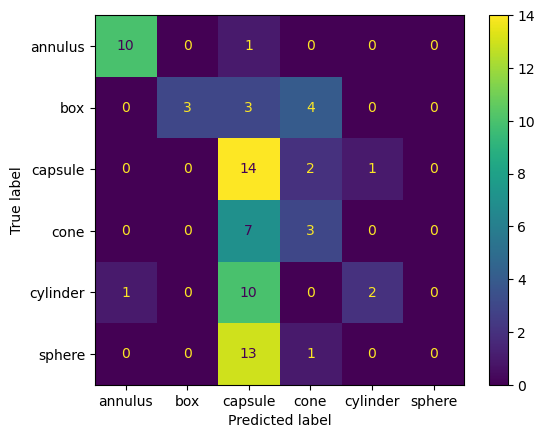

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(ada_classifier, X_test, y_test)

In [52]:
nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred_nb = nb_classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy_nb = accuracy_score(y_test, y_pred_nb)

print(f"Accuracy of Naive Bayes classifier: {accuracy_nb:.2f}")

Accuracy of Naive Bayes classifier: 0.23


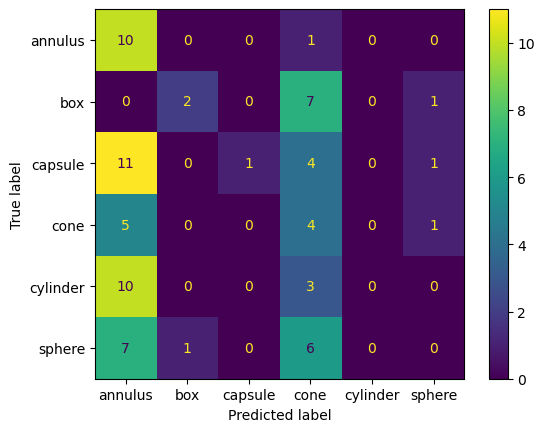

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(nb_classifier, X_test, y_test)

In [54]:
qda_classifier = QuadraticDiscriminantAnalysis()

qda_classifier.fit(X_train, y_train)

# Predict labels for the testing set.

y_pred_qda = qda_classifier.predict(X_test)

# Compute accuracy of the k-nearest neighbors classifier.

accuracy_qda = accuracy_score(y_test, y_pred_qda)

print(f"Accuracy of QDA classifier: {accuracy_qda:.2f}")

Accuracy of QDA classifier: 0.72


C:\ProgramData\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


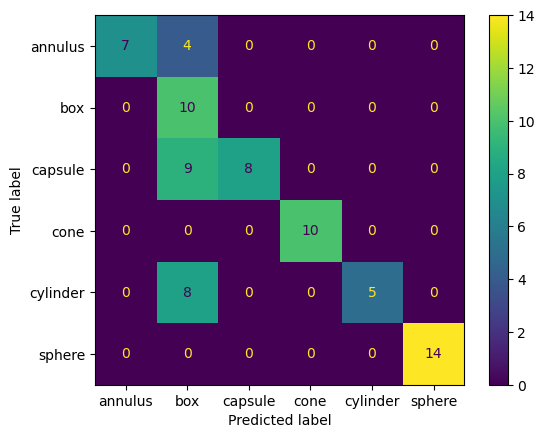

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(qda_classifier, X_test, y_test)

In [56]:
print("###############################################################")
print("##############     Classification Summary   ###################")
print("###############################################################")
print(f"Accuracy of k-nearest neighbors classifier: {accuracy_knn:.2f}")
print(f"Accuracy of Random Forest classifier: {accuracy_random:.2f}")
print(f"Accuracy of Linear SVM classifier: {accuracy_svm:.2f}")
print(f"Accuracy of RBF SVM classifier: {accuracy_rbf_svm:.2f}")
print(f"Accuracy of Gaussian Process classifier: {accuracy_gauss:.2f}")
print(f"Accuracy of Decision Tree classifier: {accuracy_dt:.2f}")
print(f"Accuracy of Neural Net classifier: {accuracy_nn:.2f}")
print(f"Accuracy of AdaBoost classifier: {accuracy_ada:.2f}")
print(f"Accuracy of Naive Bayes classifier: {accuracy_nb:.2f}")
print(f"Accuracy of QDA classifier: {accuracy_qda:.2f}")
print(f"Accuracy of GB classifier: {accuracy:.2f}")

###############################################################
##############     Classification Summary   ###################
###############################################################
Accuracy of k-nearest neighbors classifier: 0.49
Accuracy of Random Forest classifier: 0.69
Accuracy of Linear SVM classifier: 0.36
Accuracy of RBF SVM classifier: 0.60
Accuracy of Gaussian Process classifier: 0.59
Accuracy of Decision Tree classifier: 0.56
Accuracy of Neural Net classifier: 0.68
Accuracy of AdaBoost classifier: 0.43
Accuracy of Naive Bayes classifier: 0.23
Accuracy of QDA classifier: 0.72
Accuracy of GB classifier: 0.71


In [57]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117


In [25]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [58]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)
print(y_train_encoded[:20])
print(y_test_encoded[:20])

[3 0 1 5 0 4 3 4 4 4 1 4 1 4 0 2 3 5 4 1]
[4 3 3 2 1 2 4 1 2 2 5 2 3 5 2 2 2 4 1 0]


In [60]:
import torch
X_train_scaled_tensor = torch.from_numpy(np.array(X_train)).type(torch.float)
X_test_scaled_tensor = torch.from_numpy(np.array(X_test)).type(torch.float)
y_train_tensor = torch.from_numpy(np.array(y_train_encoded)).long()
y_test_tensor = torch.from_numpy(np.array(y_test_encoded)).long()

In [61]:
X_train_scaled_tensor[:5], X_test_scaled_tensor[:5]

(tensor([[-1.6700e-16,  5.1382e-02,  5.1382e-02,  6.0600e-02,  1.3578e-01,
           1.3890e-01,  1.3890e-01,  1.6386e-01,  1.6386e-01,  1.8038e-01,
           2.4564e-01,  2.4564e-01,  2.5083e-01,  2.5083e-01,  2.6238e-01,
           3.4992e-01,  3.4992e-01,  3.9062e-01,  3.9062e-01,  4.1028e-01,
           4.1028e-01,  5.6203e-01,  5.6203e-01,  6.5596e-01,  6.5596e-01,
           7.0573e-01,  7.0573e-01,  7.6523e-01,  7.6523e-01,  9.9870e-01],
         [-4.5831e-17,  6.7921e-03,  6.7921e-03,  2.5756e-02,  2.5756e-02,
           4.3981e-02,  4.9487e-02,  5.0905e-02,  5.0905e-02,  5.4077e-02,
           5.4077e-02,  5.7668e-02,  5.7668e-02,  7.1118e-02,  7.1118e-02,
           8.3079e-02,  8.3079e-02,  9.0085e-02,  9.0085e-02,  1.0310e-01,
           1.0310e-01,  1.2666e-01,  1.2666e-01,  1.3343e-01,  1.3343e-01,
           1.3669e-01,  1.4389e-01,  1.4389e-01,  1.4491e-01,  1.4491e-01],
         [ 1.6540e-16,  1.4162e-01,  1.6358e-01,  1.7236e-01,  3.9841e-01,
           4.1962e-01, 

In [62]:
y_train_tensor[:20],y_test_tensor[:20]

(tensor([3, 0, 1, 5, 0, 4, 3, 4, 4, 4, 1, 4, 1, 4, 0, 2, 3, 5, 4, 1]),
 tensor([4, 3, 3, 2, 1, 2, 4, 1, 2, 2, 5, 2, 3, 5, 2, 2, 2, 4, 1, 0]))

In [63]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [64]:
# Hyperparameters
input_size = 30
sequence_length = 30
num_layers = 2
hidden_size = 256
num_classes = 6
learning_rate = 3e-4
batch_size = 64
num_epochs = 100

In [65]:
# Create a bidirectional LSTM
class BRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(BRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(
            input_size, hidden_size, num_layers, batch_first=True, bidirectional=True
        )
        self.fc = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x)
        out = self.fc(out)

        return out

In [68]:
# Initialize network
model = BRNN(input_size, hidden_size, num_layers, num_classes).to(device)
print(model)
# Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

BRNN(
  (lstm): LSTM(30, 256, num_layers=2, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=512, out_features=6, bias=True)
)


In [69]:
for epoch in range(151):
    ### Training
    model.train()

    # 1. Forward pass
    y_logits = model(X_train_scaled_tensor) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train_tensor) 
    acc = accuracy_fn(y_true=y_train_tensor,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ## Testing
    model.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model(X_test_scaled_tensor)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_test_tensor)
      test_acc = accuracy_fn(y_true=y_test_tensor,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}%| Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.79560, Acc: 13.33%| Test Loss: 1.78396, Test Acc: 14.67%
Epoch: 10 | Loss: 1.67869, Acc: 29.33%| Test Loss: 1.74481, Test Acc: 21.33%
Epoch: 20 | Loss: 1.52213, Acc: 37.33%| Test Loss: 1.67333, Test Acc: 28.00%
Epoch: 30 | Loss: 1.32080, Acc: 48.89%| Test Loss: 1.67424, Test Acc: 26.67%
Epoch: 40 | Loss: 1.18916, Acc: 52.89%| Test Loss: 1.58272, Test Acc: 26.67%
Epoch: 50 | Loss: 1.02995, Acc: 61.78%| Test Loss: 1.68194, Test Acc: 22.67%
Epoch: 60 | Loss: 0.87690, Acc: 67.56%| Test Loss: 1.74328, Test Acc: 29.33%
Epoch: 70 | Loss: 0.71957, Acc: 72.44%| Test Loss: 1.88935, Test Acc: 25.33%
Epoch: 80 | Loss: 0.59362, Acc: 80.00%| Test Loss: 2.02344, Test Acc: 29.33%
Epoch: 90 | Loss: 0.46637, Acc: 88.89%| Test Loss: 2.12885, Test Acc: 33.33%
Epoch: 100 | Loss: 0.36847, Acc: 92.89%| Test Loss: 2.24926, Test Acc: 34.67%
Epoch: 110 | Loss: 0.28654, Acc: 95.56%| Test Loss: 2.30537, Test Acc: 34.67%
Epoch: 120 | Loss: 0.21983, Acc: 99.11%| Test Loss: 2.36011, Test Acc: 34.6

In [70]:
# Make predictions
model.eval()
with torch.inference_mode():
    y_logits = model(X_test_scaled_tensor)

# View the first 10 predictions
y_logits[:10]

tensor([[-0.2323,  0.2471,  0.5827,  3.7112, -2.5142, -0.4921],
        [-3.4987,  2.1815, -0.8767,  3.0611, -1.4013,  1.3198],
        [ 1.5369, -2.5182, -2.2207,  2.8665,  1.1332,  1.4016],
        [ 0.9870, -3.0386, -0.6849,  3.0219,  2.1689,  0.5260],
        [-5.7753,  3.5229, -1.1150,  0.1668,  2.7832,  1.4605],
        [-1.0659, -1.6499, -2.2913, -0.9497,  6.9190,  1.7733],
        [ 2.1704, -4.6844, -0.8751, -0.3418,  6.1948,  1.2911],
        [-6.1201,  3.8614,  0.4099, -0.3491,  4.4284, -0.6583],
        [-5.8263,  4.4465,  1.1061, -1.3419,  5.4904, -2.2001],
        [-1.6254,  0.3196,  1.5026, -1.2134,  6.6538, -2.7794]])

In [71]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_test_tensor[:10]}")
# print(f"Test accuracy: {accuracy_fn(y_true=y_test_tensor, y_pred=y_preds)}%")

Predictions: tensor([3, 3, 3, 3, 1, 4, 4, 4, 4, 4])
Labels: tensor([4, 3, 3, 2, 1, 2, 4, 1, 2, 2])


In [72]:
def confusion_matrix(y_true, y_pred):
    K = len(set(y_true)) # Number of classes 
    result = torch.zeros((K,K))
    for i in range(len(y_true)):
        result[y_true[i]][y_pred[i]] += 1
    return result

In [73]:
test_acc = accuracy_fn(y_true=y_test_tensor,y_pred=y_preds)

In [74]:
print("Test Accuracy:",test_acc)

Test Accuracy: 34.66666666666667


In [75]:
confusion_matrix(y_test_tensor, y_preds)

tensor([[6., 0., 1.,  ..., 0., 0., 0.],
        [0., 7., 0.,  ..., 0., 0., 0.],
        [3., 1., 7.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])